# [ IMPORTING REQUIRED LIBRARIES ]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported successfully.')

Libraries imported successfully.


# [ INSERTING DATA FROM THE GIVEN SOURCE ]

In [2]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
md = pd.DataFrame(iris.data,columns=iris.feature_names)
print('Data imported successfully.')
md.head()

Data imported successfully.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Size of the Dataset

In [7]:
md.shape

(150, 4)

### Information of the Dataset

In [8]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Description of the Dataset: 5-number summary

In [9]:
md.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this description it's noticed that values of petal length and petal width are slightly left skewed

### EDA
### [ Univariate Analysis ]
####  visualization 

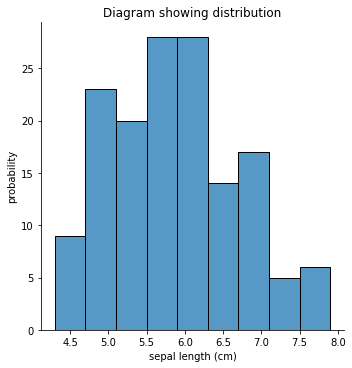

In [13]:
sns.displot(md['sepal length (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('probability')
plt.title('Diagram showing distribution')
plt.show()

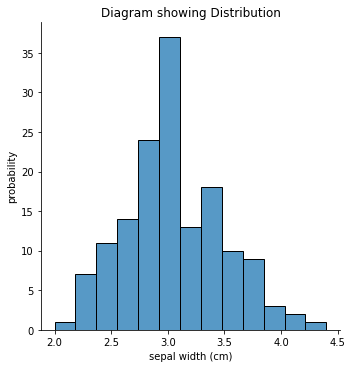

In [14]:
sns.displot(md['sepal width (cm)'])
plt.xlabel('sepal width (cm)')
plt.ylabel('probability')
plt.title('Diagram showing Distribution')
plt.show()

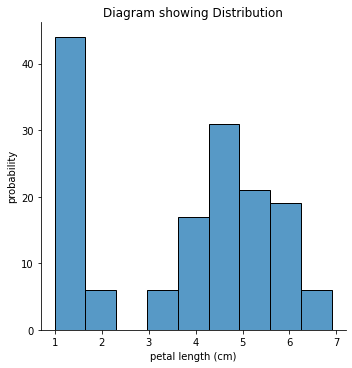

In [15]:
sns.displot(md['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('probability')
plt.title('Diagram showing Distribution')
plt.show()

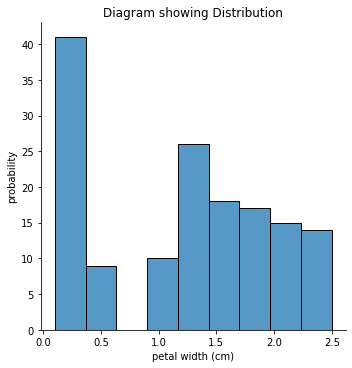

In [16]:
sns.displot(md['petal width (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('probability')
plt.title('Diagram showing Distribution')
plt.show()

### [ Multivariate Analysis ]
####  correlation between pairwise values

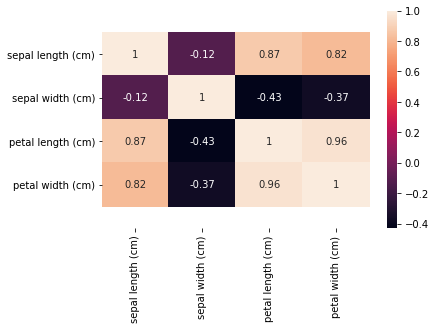

In [17]:
ax = sns.heatmap(md.corr(), annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

High positive correlation can be seen between:

    i)Petal length and Petal width
    ii)Sepal length and Petal length
    iii)Sepal length and Petal width
    
Negative correlation can be seen between:

    i)Sepal length and Sepal width
    ii)Sepal width and Petal length
    iii)Sepal width and Petal width


#### visualization using scatterplot for each pairing of the variables and histplot for the marginal plots along the diagonal

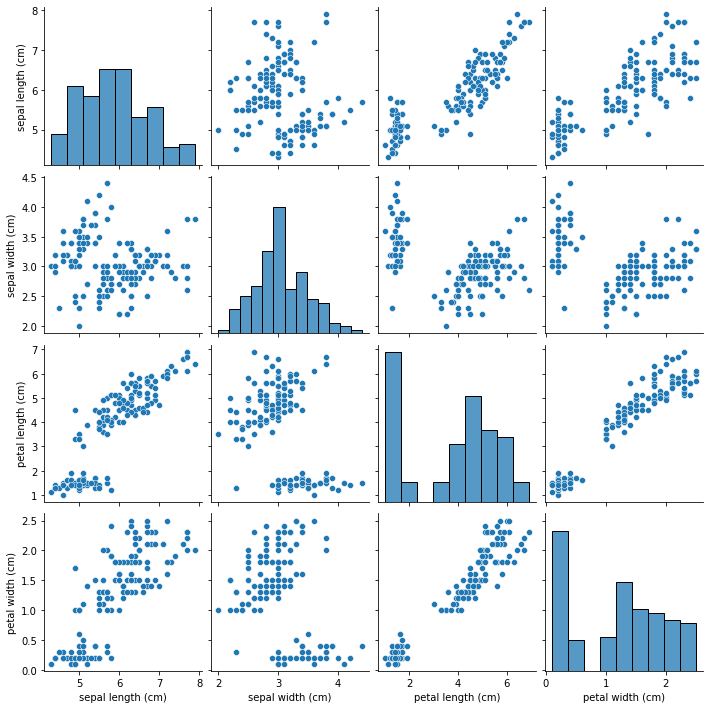

In [22]:
sns.pairplot(md)
plt.show()

It can easily be noticed above that there are two different clusters

### detecting Multicollinearity with VIF

In [23]:
import statsmodels.api as sm
Xc = sm.add_constant(md)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF' : vif[1:]},index = md.columns)

,VIF
sepal length (cm),7.072722
sepal width (cm),2.100872
petal length (cm),31.261498
petal width (cm),16.090175


we can apply PCA as the multicollinearity observed is high.

### normalising the dataset using Standard Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [27]:
mds = ss.fit_transform(md)
mds = pd.DataFrame(mds)
mds.columns = md.columns
mds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### applying PCA 

In [28]:
from sklearn.decomposition import PCA
pca = PCA()

In [29]:
pca.fit(mds)

PCA()

In [30]:
pd.DataFrame({'Eigen_Values' : pca.explained_variance_ , 'Proportion Explained' : pca.explained_variance_ratio_ , 
              'Cumulative proportion Explained' : np.cumsum(pca.explained_variance_ratio_)})

,Eigen_Values,Proportion Explained,Cumulative proportion Explained
0,2.938085,0.729624,0.729624
1,0.920165,0.228508,0.958132
2,0.147742,0.036689,0.994821
3,0.020854,0.005179,1.000000


The first 2 PCs explain 95% of variation. Thus, using PC1 and PC2

In [31]:
pca = PCA(0.95)

In [32]:
md_pca = pca.fit_transform(mds)

In [33]:
cols = list(mds.columns)

In [52]:
PCA_md = pd.DataFrame(pca.components_.T,index = cols,columns = ['PC1','PC2']).reset_index().rename(columns={'index':'Features'})
PCA_md

,Features,PC1,PC2
0,sepal length (cm),0.521066,0.377418
1,sepal width (cm),-0.269347,0.923296
2,petal length (cm),0.580413,0.024492
3,petal width (cm),0.564857,0.066942


### applying K-means Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
kmeans = KMeans(random_state = 0)

In [53]:
wcss = []
sil_score = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(md_pca)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(md_pca,kmeans.labels_))
print(wcss,'\n',sil_score)

[197.40381604541292, 115.18647050742712, 89.93490502935637, 66.57247762298218, 57.07033876393044, 47.700303949369584, 39.10634251943562, 32.12667995141309, 28.67327361688484, 25.02161936482276, 22.03055743050651, 20.20889272267039, 18.325221426658388] 
 [0.6145202036230452, 0.5113245176460453, 0.47568540514595886, 0.41736130401249055, 0.41458546512732447, 0.4248250305750346, 0.44235032248100215, 0.43843589763557833, 0.4326666169060405, 0.4357905394088804, 0.44040467840912045, 0.415301679449405, 0.4135700860488629]


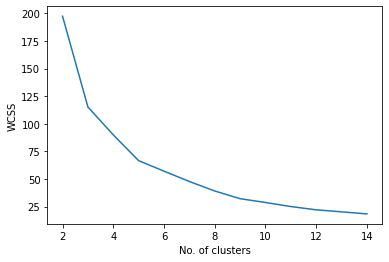

In [54]:
plt.plot(range(2,15),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

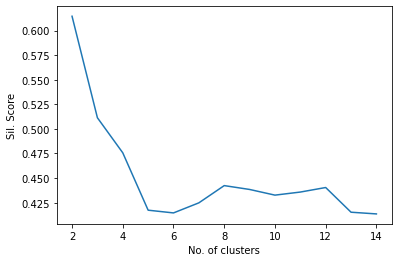

In [55]:
plt.plot(range(2,15),sil_score)
plt.xlabel('No. of clusters')
plt.ylabel('Sil. Score')
plt.show()

From these two diagrams above, we can take the number of clusters as 3.

In [56]:
kmeans = KMeans(n_clusters=3,n_init=15,random_state=0)

In [57]:
kmeans.fit(md_pca)

KMeans(n_clusters=3, n_init=15, random_state=0)

In [58]:
pd.Series(kmeans.labels_).value_counts()

1    53
0    50
2    47
dtype: int64

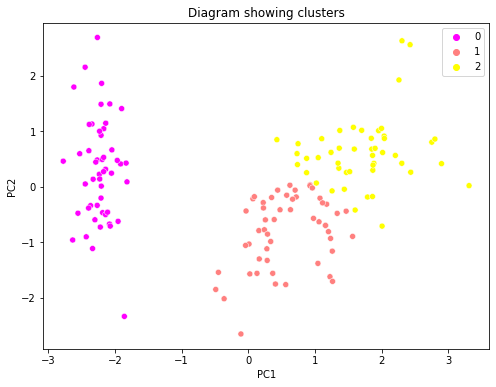

In [44]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=md_pca[:,0],y=md_pca[:,1],hue=kmeans.labels_,palette = 'spring')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Diagram showing clusters')
plt.show()

In [45]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,-2.224753,0.288927
1,0.572621,-0.807209
2,1.721037,0.602887


As we can see, centeroids from both the PCs maintain a good distance from each other. 
So, Clusters are well-distinguishable. 

In [59]:
md['labels'] = kmeans.labels_

In [60]:
md.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [49]:
md.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.801887,2.673585,4.369811,1.413208
2,6.780851,3.095745,5.510638,1.972340


Now we can draw the conclusions as:

   i)The sepal length in cluster 2 is the largest.
   
   ii)The sepal width in cluster 1 is the smallest.
   
  iii)The Petal length in cluster 2 is the largest.
  
   iv)The petal width in cluster 0 is the smallest.